**[LeetCode Link](https://leetcode-cn.com/problems/binary-tree-inorder-traversal/solution/dong-hua-yan-shi-94-er-cha-shu-de-zhong-xu-bian-li/)**

## 递归实现
题目要求的是中序遍历，那就按照 左-打印-右这种顺序遍历树就可以了，递归函数实现:
* 终止条件:当前节点为空时
* 函数内: 递归的调用左节点，打印当前节点，再递归调用右节点

### 复杂度
* 时间复杂度:O(n)
* 空间复杂度:O(h)，h是树的高度

In [ ]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def inorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        res = []
        def dfs(root):
            if not root:
                return
            # 按照 左-打印-右的方式遍历
            dfs(root.left)
            res.append(root.val)
            dfs(root.right)
        dfs(root)
        return res

## 迭代实现
递归的调用过程是不断往左边走，当左边走不下去了，就打印节点，并转向右边，然后右边继续这个过程。
我们在迭代实现时，就可以用栈来模拟上面的调用过程。
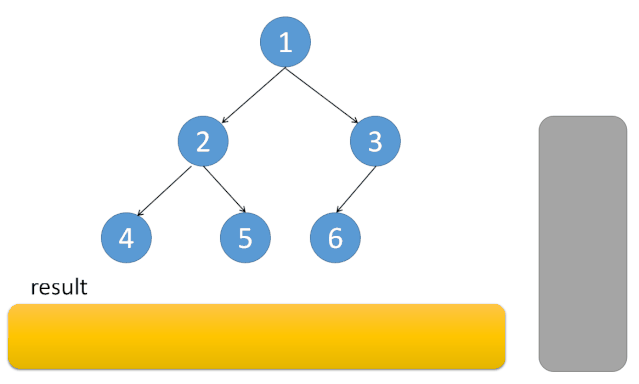

### 复杂度
* 时间复杂度:O(n)
* 空间复杂度:O(h)，h是树的高度

In [ ]:
class Solution(object):
    def inorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        res = []
        stack = []
        while stack or root:
            # 不断往左子树方向走，每走一次就将当前节点保存到栈中
            # 这是模拟递归的调用
            if root:
                stack.append(root)
                root = root.left
            # 当前节点为空，说明左边走到头了，从栈中弹出节点并保存
            # 然后转向右边节点，继续上面整个过程
            else:
                tmp = stack.pop()
                res.append(tmp.val)
                root = tmp.right
        return res

## 莫里斯遍历
用递归和迭代的方式都使用了辅助的空间，而莫里斯遍历的优点是没有使用任何辅助空间。
缺点是改变了整个树的结构，强行把一棵二叉树改成一段链表结构。
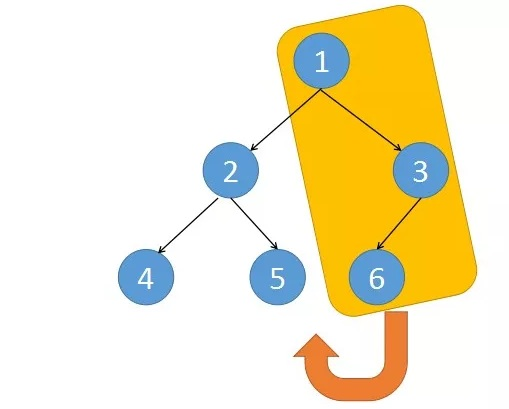
我们将黄色区域部分挂到节点5的右子树上，接着再把2和5这两个节点挂到4节点的右边。
这样整棵树基本上就变改成了一个链表了，之后再不断往右遍历。
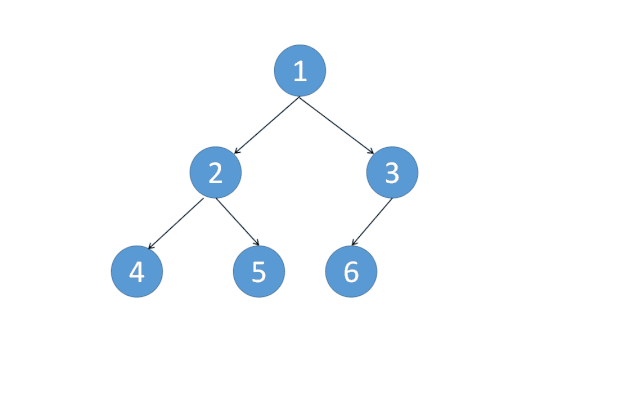

### 复杂度
* 时间复杂度:找到每个前驱节点的复杂度是O(n)，因为n个节点的二叉树有n-1条边，每条边只可能使用2次(一次定位到节点，一次找到前驱节点)，故时间复杂度为O(n)
* 空间复杂度:O(1)

In [1]:
class Solution(object):
    def inorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        res = []
        pre = None
        while root:
            # 如果左节点不为空，就将当前节点连带右子树全部挂到
            # 左节点的最右子树下面
            if root.left:
                pre = root.left
                while pre.right:
                    pre = pre.right
                pre.right = root
                # 将root指向root的left
                tmp = root
                root = root.left
                tmp.left = None
            # 左子树为空，则打印这个节点，并向右边遍历	
            else:
                res.append(root.val)
                root = root.right
        return res